<a href="https://colab.research.google.com/github/pasineemosby/PaceULankmark/blob/main/PasineeMAssgn2_2PacesLandmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

# The code in this notebook should work identically between TF v1 and v2
import tensorflow as tf
import zipfile

from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
ls '/gdrive/My Drive/Colab Notebooks/PaceU'

desktop.ini  test/  train/  val/


In [ ]:
base_dir = '/gdrive/My Drive/Colab Notebooks/PaceU'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_OnePace_dir = os.path.join(train_dir, 'OnePace')
train_41Parkrow_dir = os.path.join(train_dir, '41Parkrow')
train_Seidenberg_dir = os.path.join(train_dir, 'Seidenberg')


val_OnePace_dir = os.path.join(val_dir, 'OnePace')
val_41Parkrow_dir = os.path.join(val_dir, '41Parkrow')
val_Seidenberg_dir = os.path.join(val_dir, 'Seidenberg')

test_OnePace_dir = os.path.join(test_dir, 'OnePace')
test_41Parkrow_dir = os.path.join(test_dir, '41Parkrow')
test_Seidenberg_dir = os.path.join(test_dir, 'Seidenberg')

In [ ]:
num_OnePace_tr = len(os.listdir(train_OnePace_dir))
num_41Parkrow_tr = len(os.listdir(train_41Parkrow_dir))
num_Seidenberg_tr = len(os.listdir(train_Seidenberg_dir))

num_OnePace_val = len(os.listdir(val_OnePace_dir))
num_41Parkrow_val = len(os.listdir(val_41Parkrow_dir))
num_Seidenberg_val = len(os.listdir(val_Seidenberg_dir))

num_OnePace_test = len(os.listdir(test_OnePace_dir))
num_41Parkrow_test = len(os.listdir(test_41Parkrow_dir))
num_Seidenberg_test = len(os.listdir(test_Seidenberg_dir))

total_train = num_OnePace_tr + num_41Parkrow_tr + num_Seidenberg_tr
total_val = num_OnePace_val + num_41Parkrow_val +num_Seidenberg_val
total_test = num_OnePace_test + num_41Parkrow_test + num_Seidenberg_test

In [ ]:
TARGET_SHAPE = 150 
BATCH_SIZE = 32

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
val_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE, 
                                                     directory=train_dir, 
                                                     shuffle=True, 
                                                     target_size=(TARGET_SHAPE, TARGET_SHAPE),
                                                     class_mode='categorical')

Found 173 images belonging to 3 classes.


In [ ]:
val_data_gen = val_image_generator.flow_from_directory(batch_size=BATCH_SIZE, 
                                                              directory=val_dir, 
                                                              target_size=(TARGET_SHAPE, TARGET_SHAPE),
                                                              class_mode='categorical')

Found 15 images belonging to 3 classes.


In [ ]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=BATCH_SIZE, 
                                                              directory=test_dir, 
                                                              target_size=(TARGET_SHAPE, TARGET_SHAPE),
                                                              class_mode='categorical')

Found 15 images belonging to 3 classes.


In [ ]:
sample_training_images, sample_training_labels = next(train_data_gen)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.grid(False)
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

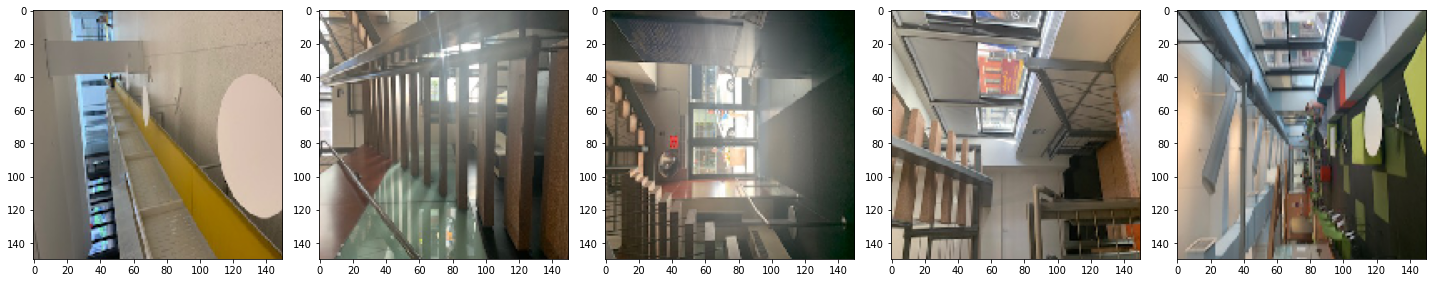

In [ ]:
plotImages(sample_training_images[:5])

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=20,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
6/6 [==============================] - 24s 4s/step - loss: 1.4612 - accuracy: 0.4566 - val_loss: 1.1408 - val_accuracy: 0.3333
Epoch 2/20
6/6 [==============================] - 1s 119ms/step - loss: 1.0686 - accuracy: 0.4451 - val_loss: 1.1097 - val_accuracy: 0.3333
Epoch 3/20
6/6 [==============================] - 1s 115ms/step - loss: 1.0439 - accuracy: 0.4509 - val_loss: 1.1633 - val_accuracy: 0.3333
Epoch 4/20
6/6 [==============================] - 1s 128ms/step - loss: 1.0274 - accuracy: 0.4451 - val_loss: 1.1167 - val_accuracy: 0.3333
Epoch 5/20
6/6 [==============================] - 1s 124ms/step - loss: 0.9935 - accuracy: 0.4451 - val_loss: 1.1018 - val_accuracy: 0.4000
Epoch 6/20
6/6 [==============================] - 1s 129ms/step - loss: 0.9628 - accuracy: 0.6127 - val_loss: 1.1546 - val_accuracy: 0.5333
Epoch 7/20
6/6 [==============================] - 1s 110ms/step - loss: 0.8604 - accur

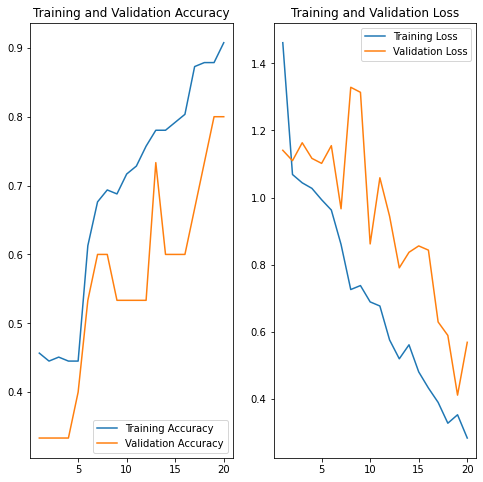

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, 20 + 1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=20,
    validation_data=test_data_gen,
    validation_steps=int(np.ceil(total_test / float(BATCH_SIZE)))
)

Epoch 1/20
6/6 [==============================] - 4s 659ms/step - loss: 0.2764 - accuracy: 0.8960 - val_loss: 1.5475 - val_accuracy: 0.6667
Epoch 2/20
6/6 [==============================] - 1s 113ms/step - loss: 0.2158 - accuracy: 0.9480 - val_loss: 1.8009 - val_accuracy: 0.6667
Epoch 3/20
6/6 [==============================] - 1s 118ms/step - loss: 0.1328 - accuracy: 0.9653 - val_loss: 2.1168 - val_accuracy: 0.7333
Epoch 4/20
6/6 [==============================] - 1s 113ms/step - loss: 0.1717 - accuracy: 0.9422 - val_loss: 1.9422 - val_accuracy: 0.6667
Epoch 5/20
6/6 [==============================] - 1s 106ms/step - loss: 0.1011 - accuracy: 0.9827 - val_loss: 1.9051 - val_accuracy: 0.7333
Epoch 6/20
6/6 [==============================] - 1s 124ms/step - loss: 0.0878 - accuracy: 0.9653 - val_loss: 1.8520 - val_accuracy: 0.7333
Epoch 7/20
6/6 [==============================] - 1s 112ms/step - loss: 0.0730 - accuracy: 0.9769 - val_loss: 2.2657 - val_accuracy: 0.7333
Epoch 8/20
6/6 [====

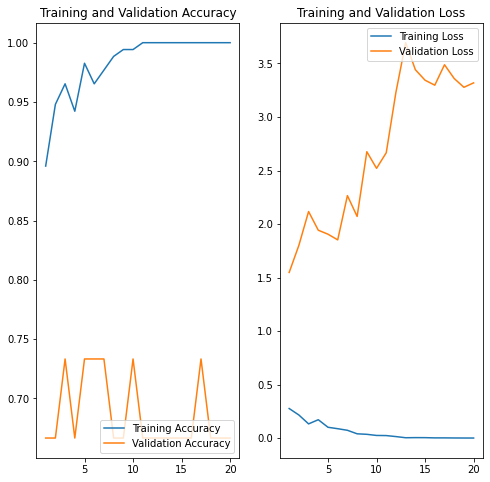

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, 20 + 1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()